# Explore here

In [106]:
#importar libreria
import pandas as pd

In [107]:
#traer dataset
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

In [108]:
#visualizar df
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [109]:
#obtener dimensiones
df.shape

(41188, 21)

In [110]:
#informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [111]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [112]:
df[df.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [113]:
#buscar duplicados
df.duplicated().sum()

np.int64(12)

In [114]:
df2 = df.copy()

In [115]:
df2.drop_duplicates(inplace=True)

In [116]:
df2[df2.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [117]:
df2.shape

(41176, 21)

In [118]:
df2.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [119]:
df3= df2.copy()

In [120]:
del(df3['marital'])

In [121]:
del(df3['education'])

In [122]:
del(df3['contact'])

In [123]:
del(df3['month'])

In [124]:
del(df3['day_of_week'])

In [125]:
del(df3['duration'])
del(df3['campaign'])
del(df3['pdays'])
del(df3['previous'])
del(df3['nr.employed'])

In [126]:
df3

,age,job,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,unknown,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,no,yes,no,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,no,no,no,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,no,no,yes,nonexistent,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,no,yes,no,nonexistent,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,no,no,no,nonexistent,-1.1,94.767,-50.8,1.028,no
41185,56,retired,no,yes,no,nonexistent,-1.1,94.767,-50.8,1.028,no
41186,44,technician,no,no,no,nonexistent,-1.1,94.767,-50.8,1.028,yes


In [127]:

def mostrar_categoricas(df3):
    categoricas = df3.select_dtypes(include=['object', 'category'])
    
    print("Variables categóricas:")
    print(categoricas.columns.tolist())
    
    return categoricas

categoricas = mostrar_categoricas(df3)


Variables categóricas:
['job', 'default', 'housing', 'loan', 'poutcome', 'y']


In [128]:
def mostrar_numericas(df3):
    numericas = df3.select_dtypes(include=['int64', 'float64'])
    
    print("Variables numéricas:")
    print(numericas.columns.tolist())
    
    return numericas

numericas = mostrar_numericas(df3)


Variables numéricas:
['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


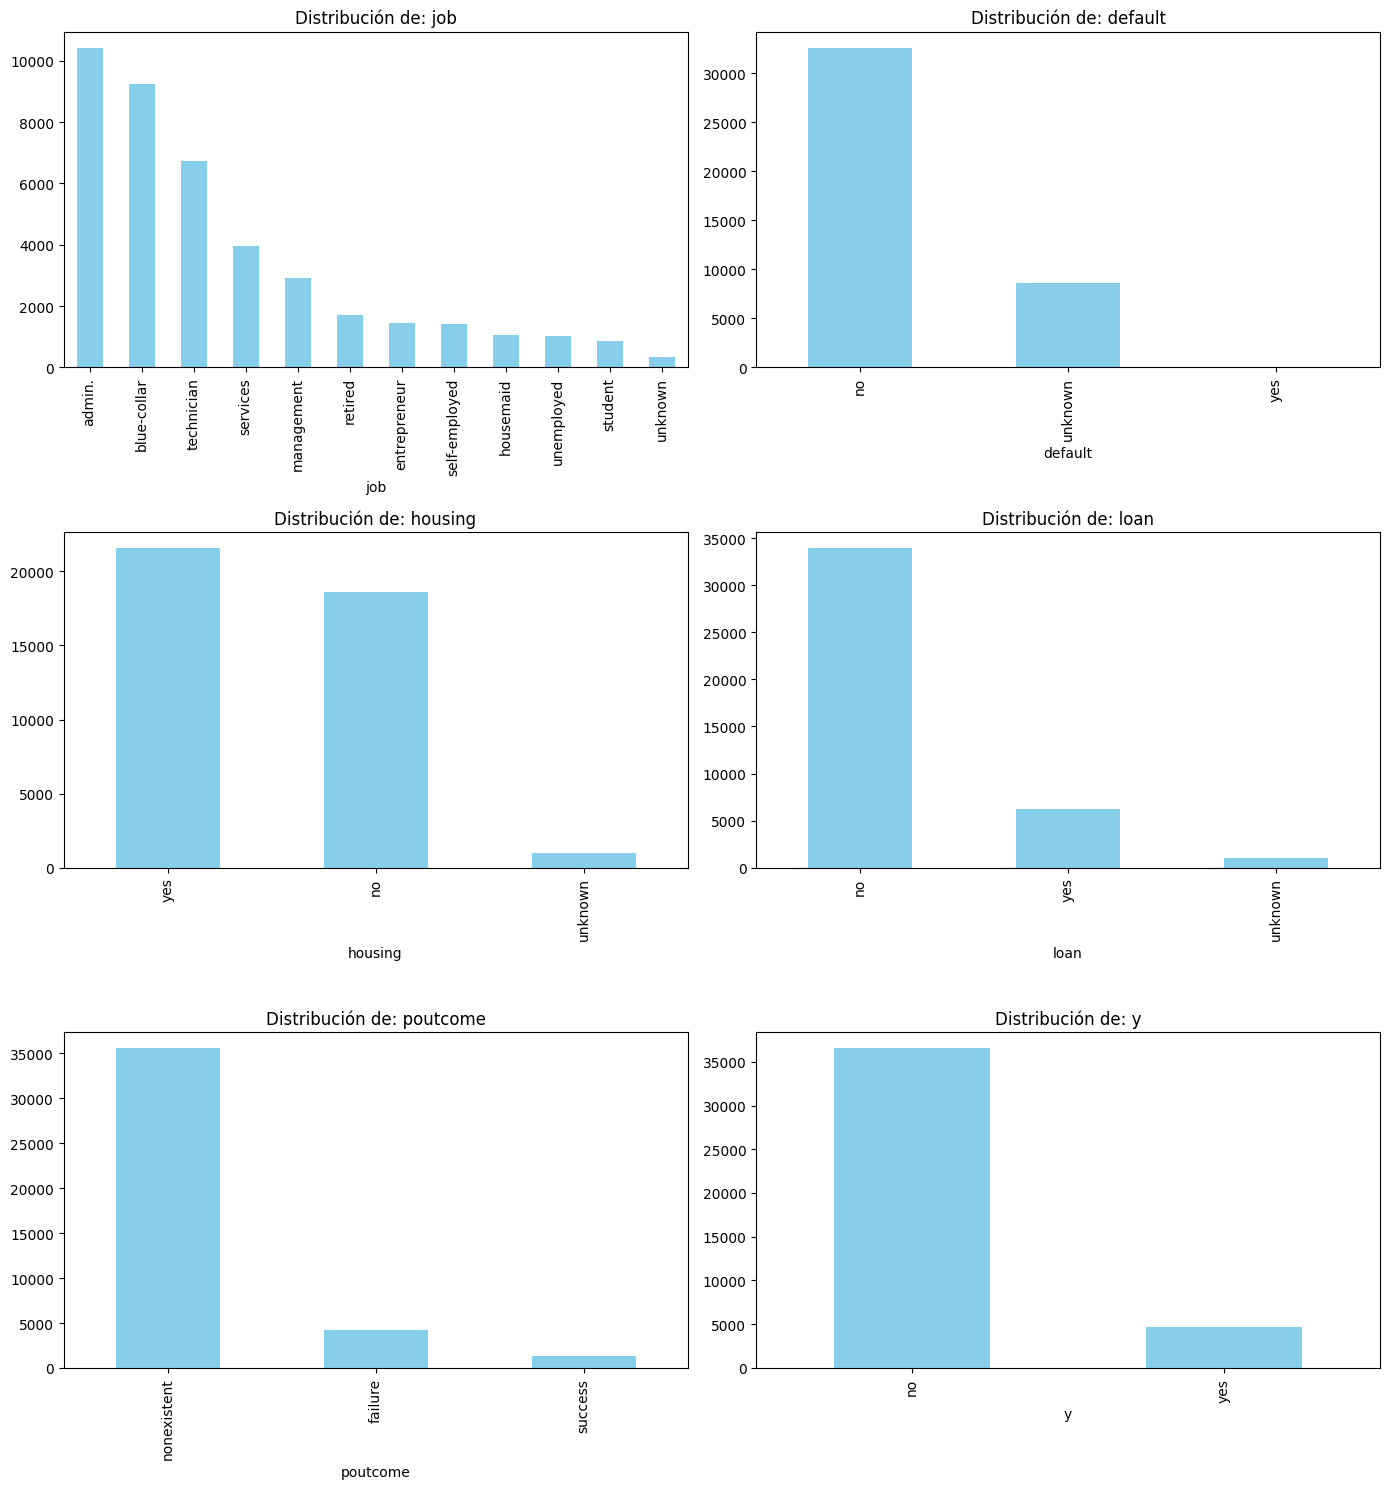

In [129]:
#analisis de variables categoricas
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_categoricas(df3):
    categoricas = df3.select_dtypes(include=['object', 'category'])
    n_cols = 2
    n_rows = (len(categoricas.columns) + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))
    axes = axes.flatten()

    for ax, col in zip(axes, categoricas.columns):
        categoricas[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f"Distribución de: {col}")

    plt.tight_layout()
    plt.show()

graficar_categoricas(df3)


Analisis
1.- Job, tenemos 11 tipos diferentes de trabajos distintos, en mayor cantidad trabajadores administrativos, trabajos manuales y tecnicos.
2.- Default, la mayor parte paga sus cuentas.
3.- Housing, la mayor parte tiene credito hipotecarios.
4.- Loan, la mayor parte no tiene credito de consumo.
5.- Poutcome, una baja cantidad de personas optaron por el deposito a plazo en la capaña anterior.
6.- y, una baja cantidad de personas optaron por el deposito a plazo.

<function matplotlib.pyplot.show(close=None, block=None)>

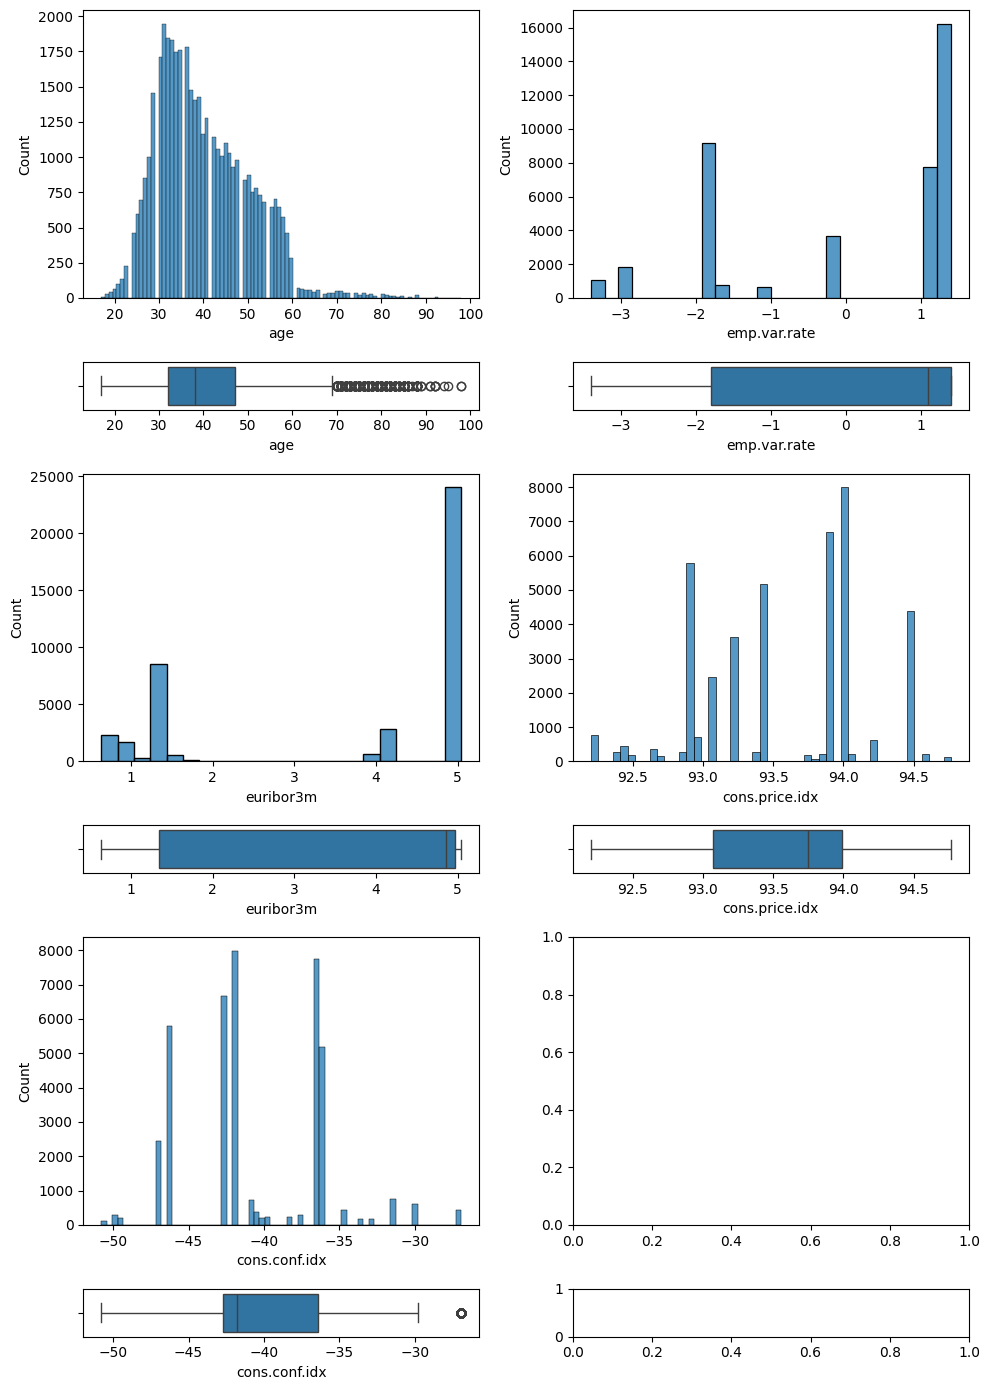

In [130]:
#analisis univariante, numericas
fig, axis = plt.subplots(6,2,figsize=(10,14),gridspec_kw={'height_ratios':[6,1,6,1,6,1]})

sns.histplot(ax=axis[0,0], data= df3,x= 'age')
sns.boxplot(ax=axis[1,0], data=df3, x='age')

sns.histplot(ax=axis[0,1], data= df3,x= 'emp.var.rate')
sns.boxplot(ax=axis[1,1], data=df3, x='emp.var.rate')

sns.histplot(ax=axis[2,0], data= df3,x= 'euribor3m')
sns.boxplot(ax=axis[3,0], data=df3, x='euribor3m')

sns.histplot(ax=axis[2,1], data= df3,x= 'cons.price.idx')
sns.boxplot(ax=axis[3,1], data=df3, x='cons.price.idx')

sns.histplot(ax=axis[4,0], data= df3,x= 'cons.conf.idx')
sns.boxplot(ax=axis[5,0], data=df3, x='cons.conf.idx')

plt.tight_layout()
plt.show



1.- Age, la edad que mayor se presenta está entre los 30 y 50 años aproximadamente.
2.- tasa de variacion del empleo, es mas alta.
3.- euribor, está en un alto porcentaje en estos momentos.

<function matplotlib.pyplot.show(close=None, block=None)>

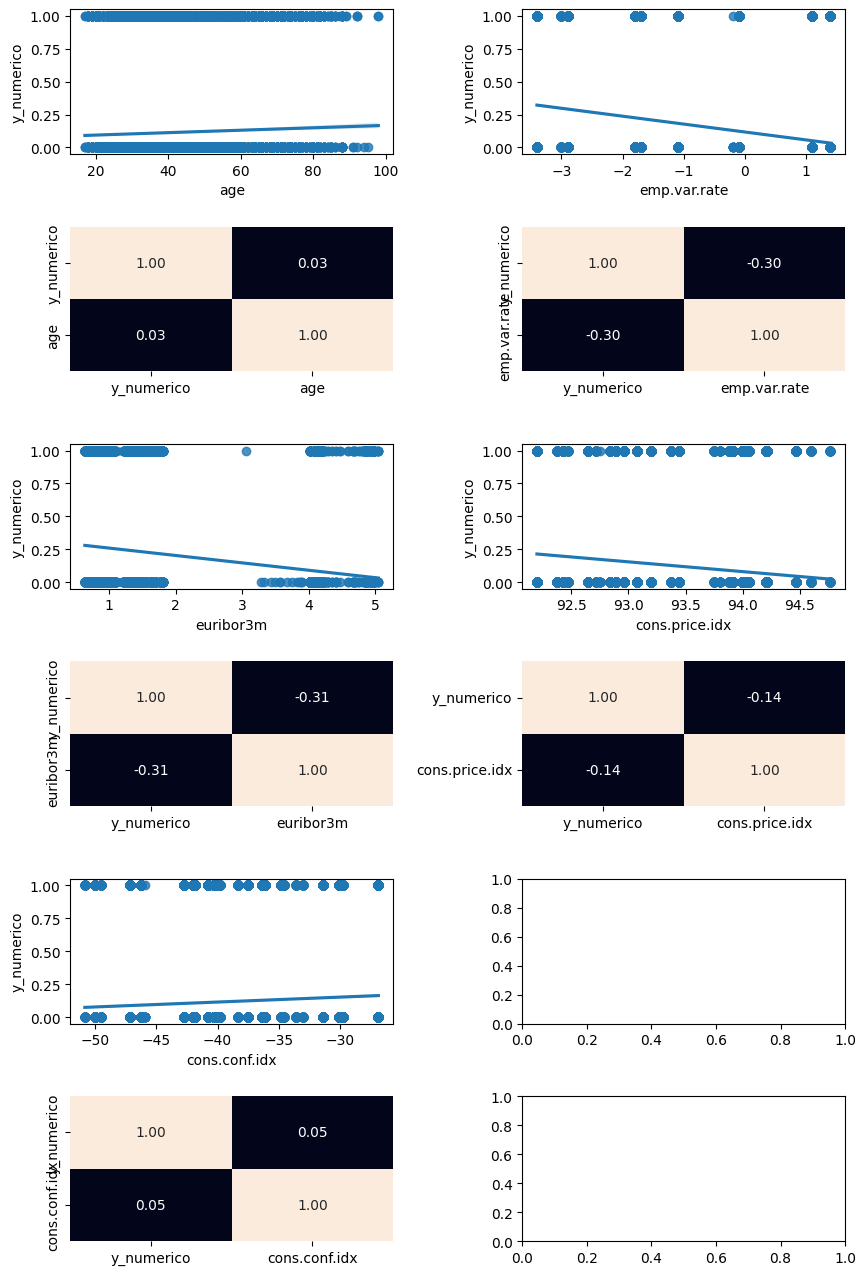

In [132]:
#analisis numerico-numerico
fig, axis = plt.subplots(6,2,figsize=(10,16))

df3['y_numerico'] = df3['y'].apply(lambda x: 1 if x == 'yes' else 0) # transformar y categorico en numerico

sns.regplot(ax = axis[0,0], data=df3, x='age', y= 'y_numerico')
sns.heatmap(df3[['y_numerico', 'age']].corr(),annot=True,fmt='.2f', ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df3, x='emp.var.rate', y= 'y_numerico')
sns.heatmap(df3[['y_numerico', 'emp.var.rate']].corr(),annot=True,fmt='.2f', ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df3, x='euribor3m', y= 'y_numerico')
sns.heatmap(df3[['y_numerico', 'euribor3m']].corr(),annot=True,fmt='.2f', ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df3, x='cons.price.idx', y= 'y_numerico')
sns.heatmap(df3[['y_numerico', 'cons.price.idx']].corr(),annot=True,fmt='.2f', ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[4,0], data=df3, x='cons.conf.idx', y= 'y_numerico')
sns.heatmap(df3[['y_numerico', 'cons.conf.idx']].corr(),annot=True,fmt='.2f', ax=axis[5,0],cbar=False)

plt.tight_layout
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show

1.- age y y, podemos decir que a medida que aumenta la edad las personas optan por un deposito a plazo, pero no tienen una alta correlación.
2.- emp.var.rate y y, podemos decir que a medida que aumenta la tasa de desempleo las personas no optan por un deposito a plazo.
3.- euribor y y, a medida que aumenta el euribor hay disminucion en la aceptacion de un deposito a plazo

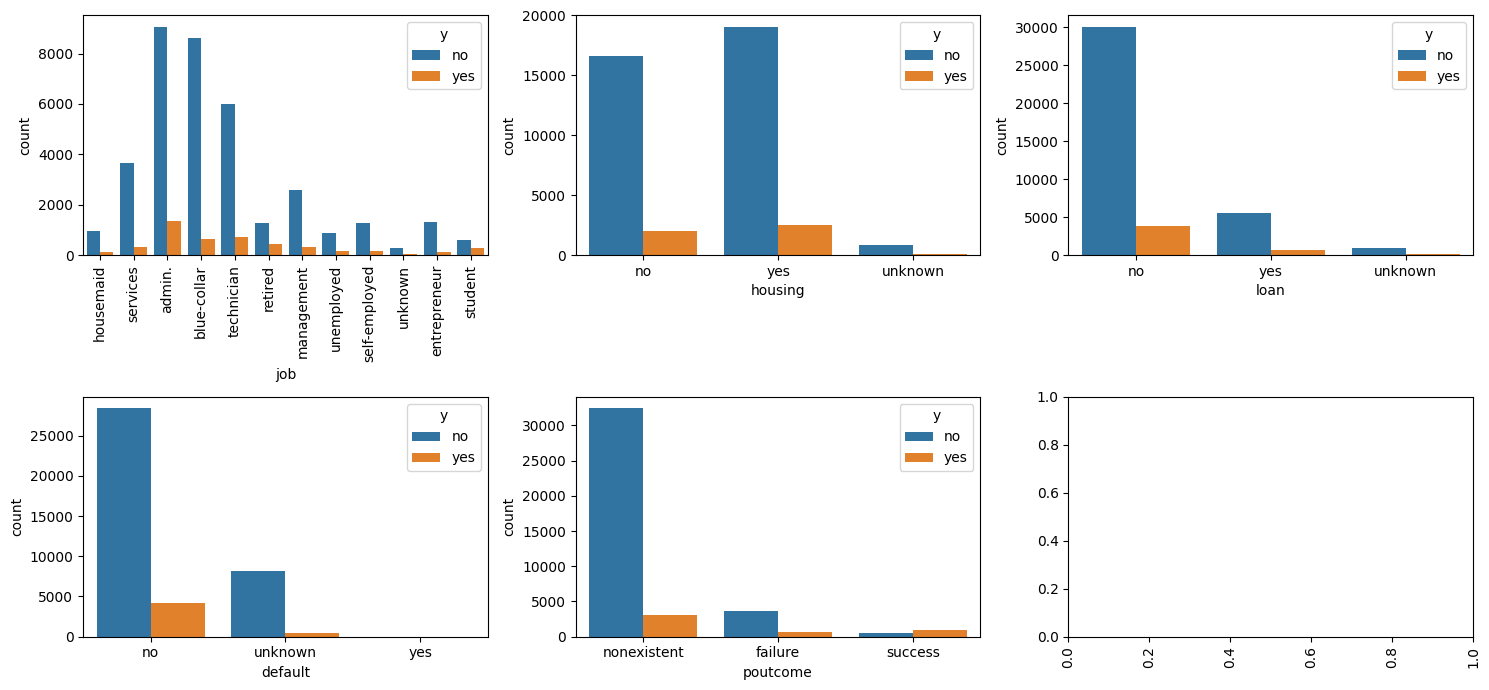

In [133]:
#analisis categorico-categorico
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df3, x = "job", hue = "y")
axis[0,0].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[0, 1], data = df3, x = "housing", hue = "y")
sns.countplot(ax = axis[0, 2], data = df3, x = "loan", hue = "y")
sns.countplot(ax = axis[1, 0], data = df3, x = "default", hue = "y") 
sns.countplot(ax = axis[1, 1], data = df3, x = "poutcome", hue = "y")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

1.- Podemos decir que las personas con trabajo administrativo, trabajos manuales y tecnicos son los que mas optan por un deposito a plazo.
2.- Las personas que tienen o no credito hipotecario optan en una cantidad similar a un deposito a plazo.
3.- En mayor cantidad las personas que no tienen credito de consumo optan por un deposito a plazo.
4.- La mayor cantidad de personas que no tienen deudas optan por un deposito a plazo
5.- En la campaña anterior una baja cantidad de personas optaron por el deposito a plazo

In [134]:
#analisis numerico-categorico, volver las columnas categoricas en numericas
df3['job'] = pd.factorize(df3['job'])[0]   #las columnas que son categoricas volverlas numericas 
df3['housing'] = pd.factorize(df3['housing'])[0] 
df3['loan'] = pd.factorize(df3['loan'])[0]
df3['default'] = pd.factorize(df3['default'])[0] 
df3['poutcome'] = pd.factorize(df3['poutcome'])[0] 
df3['y'] = pd.factorize(df3['y'])[0] 

In [135]:
df3.head()

,age,job,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_numerico
0,56,0,0,0,0,0,1.1,93.994,-36.4,4.857,0,0
1,57,1,1,0,0,0,1.1,93.994,-36.4,4.857,0,0
2,37,1,0,1,0,0,1.1,93.994,-36.4,4.857,0,0
3,40,2,0,0,0,0,1.1,93.994,-36.4,4.857,0,0
4,56,1,0,0,1,0,1.1,93.994,-36.4,4.857,0,0


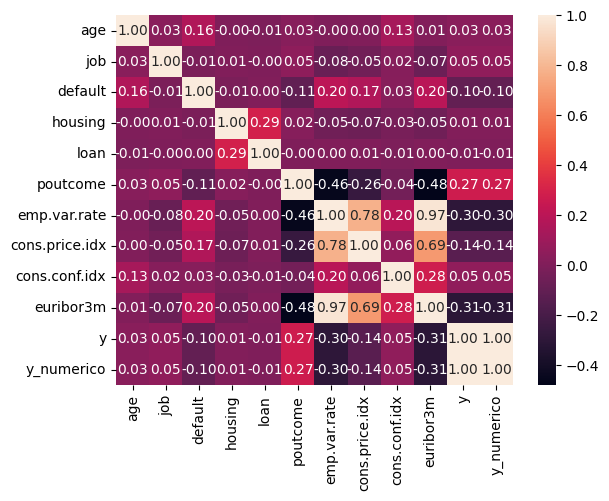

In [136]:
sns.heatmap(df3.corr(), annot=True, fmt='.2f')
plt.show()

Analisis de correlaciones
-El euribor tiene una alta correlacion con la tasa de desempleo (0.97)
-Podemos decir que la variable y tiene una aproximadamente una moderada correlacion con el resultado de la campaña anterior(0,27)
- La variable y con la tasa de desempleo tiene una correlacion negativa, por lo que cuando una aumenta la otra disminuye y lo mismo ocurre entre la variable y y euribor (-0.30 y -0.31)

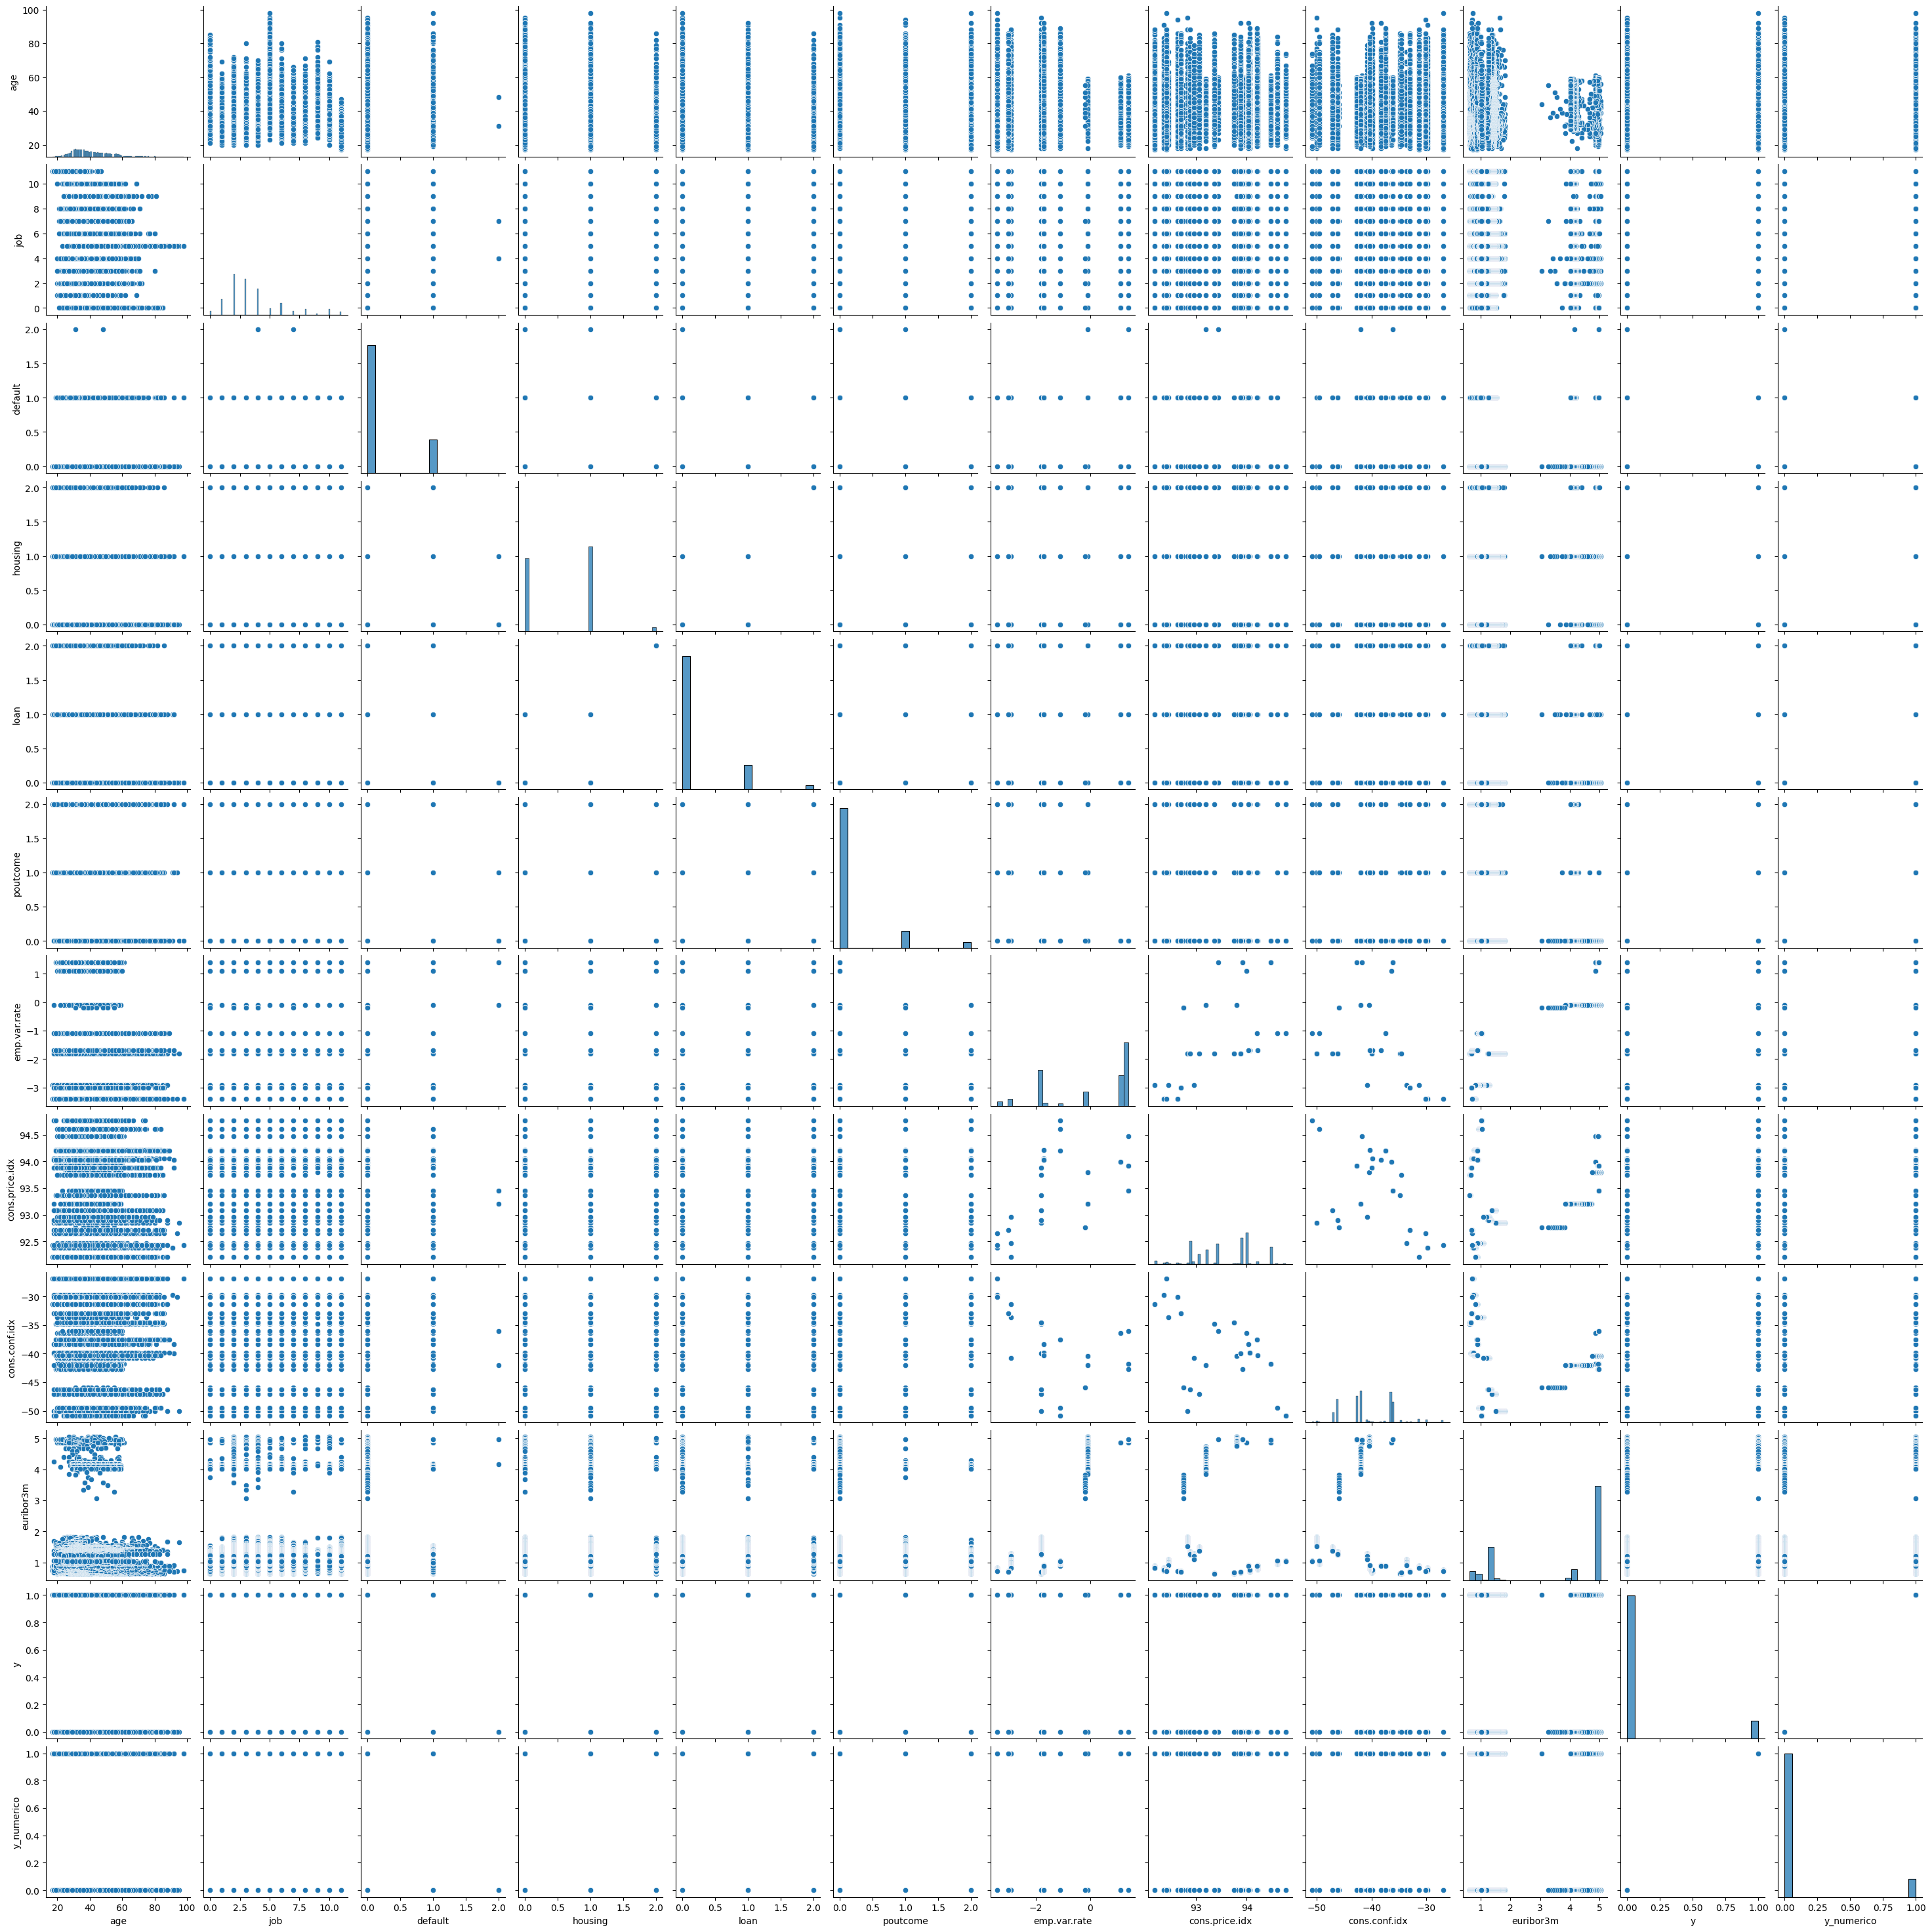

In [137]:

sns.pairplot(data=df3)

In [138]:
#ingeneria de caracteristicas
df3.describe()

,age,job,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_numerico
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,0.208908,0.571959,0.199825,0.169953,0.081922,93.575720,-40.502863,3.621293,0.112663,0.112663
std,10.42068,2.454340,0.406713,0.541216,0.456055,0.455811,1.570883,0.578839,4.627860,1.734437,0.316184,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000,0.000000
50%,38.00000,3.000000,0.000000,1.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,0.000000,0.000000
75%,47.00000,4.000000,0.000000,1.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,0.000000,0.000000
max,98.00000,11.000000,2.000000,2.000000,2.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,1.000000,1.000000


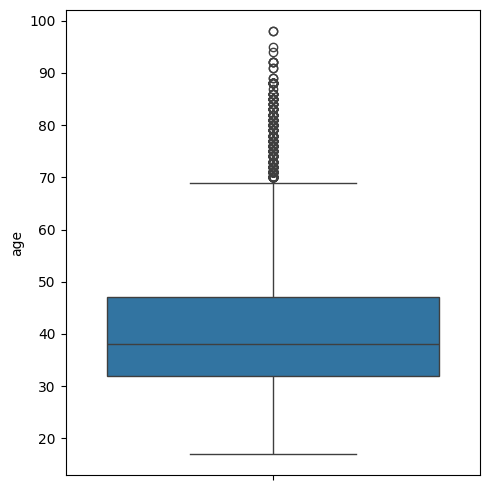

In [139]:
#conocer los outlier a traves de boxplot

fig, axis = plt.subplots(1,1, figsize=(5,5))

sns.boxplot(ax=axis, data=df3, y= 'age')

plt.tight_layout()
plt.show()

In [140]:
#limpiar outlier
edades= df3['age'].describe()
edades

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [141]:
def analisis_ric(columna,df3): #una manera de buscar el rango intercuartilico
    estadisticas = df3[columna].describe()
    ric = estadisticas ['75%'] - estadisticas ['25%']
    lim_sup = estadisticas ['75%'] + 1.5 * ric
    lim_inf = estadisticas ['25%'] - 1.5 * ric
    print(f'Superior {lim_sup} e inferior { lim_inf}')

In [142]:
analisis_ric('age',df3)

Superior 69.5 e inferior 9.5


In [143]:
#rango intercuartilico para poder eliminar outlier/otra manera de buscar el rango intercuartilico
ric= edades['75%'] - edades['25%']
limite_sup = edades ['75%'] + 1.5 * ric
limite_inf = edades ['25%'] - 1.5 * ric

print(f'Superior {limite_sup} e inferior { limite_inf}')

Superior 69.5 e inferior 9.5


In [144]:
df3[df3['age']>=80].count()

age               150
job               150
default           150
housing           150
loan              150
poutcome          150
emp.var.rate      150
cons.price.idx    150
cons.conf.idx     150
euribor3m         150
y                 150
y_numerico        150
dtype: int64

In [145]:
#eliminar outlier, solo quedaran las personas que tienen 80 y menos años
df3 = df3[df3['age']<=80]

In [146]:
df3.columns

Index(['age', 'job', 'default', 'housing', 'loan', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y', 'y_numerico'],
      dtype='object')

In [148]:
df3.head()

,age,job,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,y_numerico
0,56,0,0,0,0,0,1.1,93.994,-36.4,4.857,0,0
1,57,1,1,0,0,0,1.1,93.994,-36.4,4.857,0,0
2,37,1,0,1,0,0,1.1,93.994,-36.4,4.857,0,0
3,40,2,0,0,0,0,1.1,93.994,-36.4,4.857,0,0
4,56,1,0,0,1,0,1.1,93.994,-36.4,4.857,0,0


In [149]:
#escalado de valores, para que todos esten entre 0 y 1 

from sklearn.preprocessing import MinMaxScaler


variables = ['age', 'job',
       'default', 'housing', 'loan','poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y']
scaler = MinMaxScaler()
caracteristicas_escaladas = scaler.fit_transform(df3[variables])

df3_escalado = pd.DataFrame(caracteristicas_escaladas, index= df3.index, columns=variables)

df3_escalado.head()

,age,job,default,housing,loan,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0.619048,0.000000,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.0
1,0.634921,0.090909,0.5,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.0
2,0.317460,0.090909,0.0,0.5,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.0
3,0.365079,0.181818,0.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.0
4,0.619048,0.090909,0.0,0.0,0.5,0.0,0.9375,0.698753,0.60251,0.957379,0.0


In [150]:
#seleccion de caracteristicas
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split

X = df3_escalado.drop('y', axis=1)
y = df3_escalado['y'] #variable a predecir

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)


modelo_seleccion = SelectKBest(f_classif,k=6)
modelo_seleccion.fit(X_train,y_train)
ix = modelo_seleccion.get_support()

X_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train), columns= X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test), columns= X_test.columns.values[ix])

print(X)

            age       job  default  housing  loan  poutcome  emp.var.rate  \
0      0.619048  0.000000      0.0      0.0   0.0       0.0      0.937500   
1      0.634921  0.090909      0.5      0.0   0.0       0.0      0.937500   
2      0.317460  0.090909      0.0      0.5   0.0       0.0      0.937500   
3      0.365079  0.181818      0.0      0.0   0.0       0.0      0.937500   
4      0.619048  0.090909      0.0      0.0   0.5       0.0      0.937500   
...         ...       ...      ...      ...   ...       ...           ...   
41183  0.888889  0.454545      0.0      0.5   0.0       0.0      0.479167   
41184  0.460317  0.272727      0.0      0.0   0.0       0.0      0.479167   
41185  0.619048  0.454545      0.0      0.5   0.0       0.0      0.479167   
41186  0.428571  0.363636      0.0      0.0   0.0       0.0      0.479167   
41187  0.904762  0.454545      0.0      0.5   0.0       0.5      0.479167   

       cons.price.idx  cons.conf.idx  euribor3m  
0            0.698753    

In [151]:
from sklearn.linear_model import LogisticRegression
modelo_seleccion = LogisticRegression()
modelo_seleccion.fit(X_train, y_train)

LogisticRegression()

In [152]:
y_pred = modelo_seleccion.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score

acc_score= accuracy_score(y_test, y_pred)
acc_score


0.8985630784218217

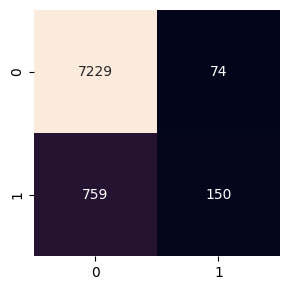

In [154]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_test, y_pred)

#dibujar matriz
mc_df3 = pd.DataFrame(mc)

plt.figure(figsize=(3,3))
sns.heatmap(mc_df3, annot=True, fmt='d', cbar=False)

plt.tight_layout()
plt.show()

Los que no van a contratar un deposito a largo plazo son 7229, los que me no me van a contratar pero predije que si me van a contratar son 759, los que me van a contratar que predije son 150, y los que me podrian haber contratado pero no me contrataron son 74.

In [46]:
tasa_conversion_antes = (47+12)/(7278+877+12+47)
tasa_conversion_antes

0.007182858534209886

In [47]:
tasa_conversion_modelo = 47/(47+12)
tasa_conversion_modelo

0.7966101694915254

In [155]:
#hiperparametros

from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(modelo_seleccion, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [156]:
#para obtener los mejor hiperparametros
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [157]:
best_model = grid.best_estimator_


In [160]:
y_b_pred = best_model.predict(X_test)
accuracy_score(y_test, y_b_pred)

0.8986848514369216